# Load tuner session

In [1]:
import keras_tuner
import tune_keras_class as tkc

# Assuming LOG_DIR is defined in your script as it was used in the tuning session
LOG_DIR = f"hyperband_54h"

# Load the tuner
tuner = keras_tuner.Hyperband(
    hypermodel=tkc.PmsmHyperModel(),
    objective='val_loss',
    # executions_per_trial=1,
    factor=4,
    hyperband_iterations=3,
    overwrite=False,
    directory=LOG_DIR,
    project_name='hyperband',)
# Now you can use the tuner object to access the tuning session results or continue the search
# For example, to get the best models:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

# Or to continue the search:
# tuner.search(**fit_args)

2024-06-27 10:49:07.973250: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 10:49:15.185148: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Reloading Tuner from hyperband_54h/hyperband/tuner0.json
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 91)]          0         
                                                                 
 conv1d (Conv1D)             (None, 32, 53)            33814     
                                                                 
 batch_normalization (Batch  (None, 32, 53)            212       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 32, 53)            0         
                                                                 
 spatial_dropout1d (Spatial  (None, 32, 53)            0         
 Dropout1D)                                                      
                                                                 
 glo

2024-06-27 10:49:31.662837: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9959 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:05:00.0, compute capability: 6.1
2024-06-27 10:49:31.663399: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 9430 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:06:00.0, compute capability: 6.1
2024-06-27 10:49:31.663759: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 9800 MB memory:  -> device: 2, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:09:00.0, compute capability: 6.1
2024-06-27 10:49:31.664222: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 9800 MB memory:  -> device: 3, name: NVIDIA GeForce GTX

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 91)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 32, 112)              51072     ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 32, 112)              448       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 32, 112)              0         ['batch_normalization[0][0

# Show top 10 trials of the tuner session

In [2]:
tuner.results_summary(num_trials=10)

Results summary
Results in hyperband_54h/hyperband
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0393 summary
Hyperparameters:
n_layers: 1
n_units: 53
kernel_size: 7
regularization_rate: 2.780121739864642e-08
dropout_rate: 0.33155057064133653
lr_rate: 0.00041103832448635377
tuner/epochs: 7
tuner/initial_epoch: 2
tuner/bracket: 3
tuner/round: 1
tuner/trial_id: 0334
Score: 0.007547460030764341

Trial 0415 summary
Hyperparameters:
n_layers: 6
n_units: 112
kernel_size: 5
regularization_rate: 5.740274199875547e-07
dropout_rate: 0.2590930319794237
lr_rate: 0.0012857402548313726
tuner/epochs: 100
tuner/initial_epoch: 25
tuner/bracket: 3
tuner/round: 3
tuner/trial_id: 0412
Score: 0.009724129922688007

Trial 0412 summary
Hyperparameters:
n_layers: 6
n_units: 112
kernel_size: 5
regularization_rate: 5.740274199875547e-07
dropout_rate: 0.2590930319794237
lr_rate: 0.0012857402548313726
tuner/epochs: 25
tuner/initial_epoch: 7
tuner/bracket: 3
tuner/round: 2
tuner/trial_id

# Load best model of the tuner session

In [3]:
from preprocessing.cnn_model_utils import CNNKerasRegressor

def dummy_build_fn():
    # Load the model architecture from the JSON file
    with open('path_to_your_model.json', 'r') as json_file:
        model_json = json_file.read()
    # model = model_from_json(json_string=model_json)
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = CNNKerasRegressor(build_fn=None)

best_hp = tuner.get_best_hyperparameters()[0]
model.model = tuner.hypermodel.build(best_hp)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 91)]          0         
                                                                 
 conv1d_9 (Conv1D)           (None, 32, 53)            33814     
                                                                 
 batch_normalization_6 (Bat  (None, 32, 53)            212       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 32, 53)            0         
                                                                 
 spatial_dropout1d_6 (Spati  (None, 32, 53)            0         
 alDropout1D)                                                    
                                                                 
 global_max_pooling1d_1 (Gl  (None, 53)                0   

# Load data

In [4]:
import numpy as np
import preprocessing.config as cfg
from preprocessing.data import LightDataManager

# Ensure reproducibility
SEED = cfg.data_cfg["random_seed"]
np.random.seed(SEED)

file_path = 'data/input/8h_run.csv'
dm = LightDataManager(file_path)
dm.featurize()


build dataset ..
111.14253807067871 MB
took 2.42 seconds


# Predict on the test set
*The model has at this point only been trained on the the ressources allocated by HyperBand.*

2024-06-27 10:49:37.552085: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8907


250/250 [==============================] - 2s 5ms/step


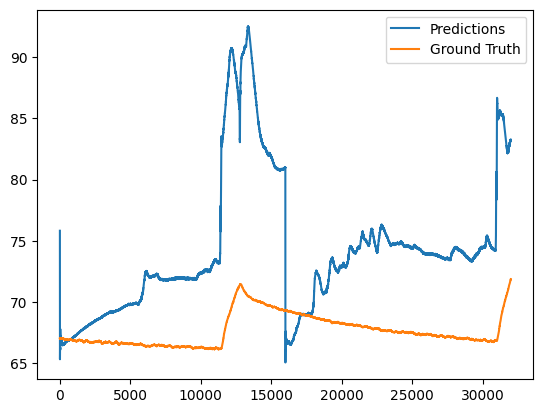

In [5]:
import matplotlib.pyplot as plt


predict_cfg = {'batch_size': 128,
                'window_size': 32,
                'p_id_col': dm.PROFILE_ID_COL,
                }

# predict
x_tst = dm.tst_df[dm.x_cols + [dm.PROFILE_ID_COL]]
y_tst = dm.tst_df[dm.y_cols]

model.__class__ = CNNKerasRegressor

pred = model.predict(x_tst, **predict_cfg)
pred = dm.inverse_transform(df=pred)
y_tst = dm.inverse_transform(y_tst)

plt.figure()
plt.plot(pred, label='Predictions')
plt.plot(y_tst, label='Ground Truth')
plt.legend()
plt.show()

# Resume training on the full dataset

In [6]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tune_keras_class import PmsmHyperModel

x_train = dm.tra_df[dm.x_cols + [dm.PROFILE_ID_COL]]
y_train = dm.tra_df[dm.y_cols]
x_val = dm.val_df[dm.x_cols + [dm.PROFILE_ID_COL]]
y_val = dm.val_df[dm.y_cols]

batch_size = cfg.keras_cfg["cnn_params"].get("batch_size")
window_size = cfg.keras_cfg["window_size"]

callbacks = [
    EarlyStopping(
        monitor="val_loss",
        min_delta=1e-3,
        patience=cfg.keras_cfg["early_stop_patience"],
        verbose=1,
    ),
    ReduceLROnPlateau(
        monitor="loss", patience=cfg.keras_cfg["early_stop_patience"] // 3
    ),
]

KerasRegressor_config = {
    "x_shape": (cfg.keras_cfg["window_size"], len(dm.x_cols)),
    "verbose": 1,
    "loss": dm.loss_func,
}

fit_cfg = {
    "x": x_train,
    "y": y_train,
    "batch_size": batch_size,
    "window_size": window_size,
    "validation_data": (x_val, y_val),
    "epochs": cfg.keras_cfg["cnn_params"]["epochs"],
    "shuffle": True,
    "callbacks": callbacks,
    "p_id_col": dm.PROFILE_ID_COL,
    # "data_cache": trial_reports.data_cache,
    # "x_shape": KerasRegressor_config["x_shape"],
    # "callbacks": [tensorboard_callback]
}

# Get the top 2 hyperparameters.
best_hps = tuner.get_best_hyperparameters(5)
# Build the model with the best hp.
HyperModel = PmsmHyperModel()
retrained_model = HyperModel.build(best_hps[1])
# Fit with the entire dataset.
HyperModel.fit(hp=best_hps[1], model=retrained_model, **fit_cfg)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 32, 91)]             0         []                            
                                                                                                  
 conv1d_10 (Conv1D)          (None, 32, 112)              51072     ['input_3[0][0]']             
                                                                                                  
 batch_normalization_7 (Bat  (None, 32, 112)              448       ['conv1d_10[0][0]']           
 chNormalization)                                                                                 
                                                                                                  
 activation_7 (Activation)   (None, 32, 112)              0         ['batch_normalization_7[

2024-06-27 10:49:46.742630: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x28c687b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-06-27 10:49:46.742666: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-06-27 10:49:46.742672: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-06-27 10:49:46.742676: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-06-27 10:49:46.742680: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (3): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-06-27 10:49:46.747487: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to en

2468/2468 [==============================] - 55s 18ms/step - loss: 0.3882 - val_loss: 0.1151 - lr: 0.0013
Epoch 2/250
2468/2468 [==============================] - 44s 18ms/step - loss: 0.0693 - val_loss: 0.1031 - lr: 0.0013
Epoch 3/250
2468/2468 [==============================] - 44s 18ms/step - loss: 0.0506 - val_loss: 0.1850 - lr: 0.0013
Epoch 4/250
2468/2468 [==============================] - 46s 19ms/step - loss: 0.0286 - val_loss: 0.0682 - lr: 0.0013
Epoch 5/250
2468/2468 [==============================] - 44s 18ms/step - loss: 0.0293 - val_loss: 0.0558 - lr: 0.0013
Epoch 6/250
2468/2468 [==============================] - 44s 18ms/step - loss: 0.0101 - val_loss: 0.0471 - lr: 1.2857e-04
Epoch 7/250
2468/2468 [==============================] - 43s 17ms/step - loss: 0.0072 - val_loss: 0.0438 - lr: 1.2857e-04
Epoch 8/250
2468/2468 [==============================] - 41s 17ms/step - loss: 0.0056 - val_loss: 0.0369 - lr: 1.2857e-04
Epoch 9/250
2468/2468 [==============================] -

2468/2468 [==============================] - 14s 5ms/step


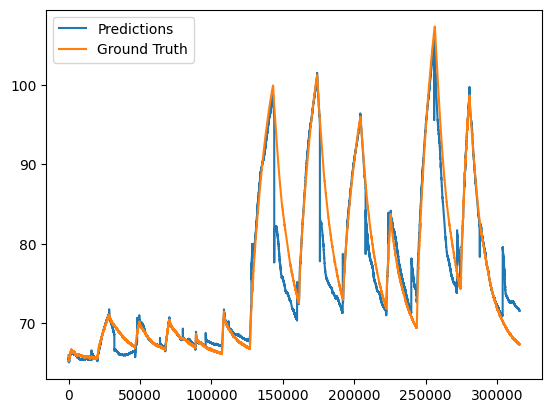

In [7]:
import matplotlib.pyplot as plt

PMSMModel = CNNKerasRegressor()
PMSMModel.model = retrained_model

# x_tst = dm.tst_df[dm.x_cols + [dm.PROFILE_ID_COL]]
# y_tst = dm.tst_df[dm.y_cols]
x_tst = x_train
y_tst = y_train

pred = PMSMModel.predict(x_tst, **predict_cfg)
pred = dm.inverse_transform(df=pred)
y_tst = dm.inverse_transform(y_tst)

plt.figure()
plt.plot(pred, label='Predictions')
plt.plot(y_tst, label='Ground Truth')
plt.legend()
plt.show()